# 전략: Pandas로 데이터 개요 확인

>메타데이터와 레코드 수를 이용해서 데이터 분포 및 품질을 살펴보는 전략이다.



In [1]:
import pandas as pd
import numpy as np



In [2]:
df = pd.read_csv("/content/drive/MyDrive/UN/un-general-debates.csv")

### 요약통계를 계산한다.

**열에 대한 요약 통계 계산**

>pandas의 describe 함수는 데이터프레임의 열에 대한 통계 요약을 계산하고, 데이터 프레임뿐만 아니라 단일 시리즈에서도 작동한다.

<br>

>단일 시리즈에서 통계 요약을 계산한 경우 데이터프레임에는 기본 출력이 숫자 열로 제한되고, 현재 데이터프레임에는 세션 번호와 연도만 숫자 데이터로 존재하므로, 연설의 길이 분포에 대한 추가 정보를 얻기 위해서 텍스트 길이 열 추가 후 행열 전환

In [3]:
df['length'] = df['text'].str.len()

df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


숫자가 아닌 열의 요약은 include='0'(np.object의 별칭)를 지정해 생성하고, 열에 들어 있는 데이터의 개수, 고유값의 수, 최상위 요소 및 최상위 요소의 빈도를 얻고, 고유값은 텍스트 데이터에 유용하지 않으므로 국가 빛 발표자 열을 분석한다.

In [9]:
df[['country']].describe(include='O').T

,count,unique,top,freq
country,7507,199,IRN,46


---

**누락된 데이터 확인**

>누락된 값을 확인하는 방법은 df.isna()를 사용하여 모든 열에 null값이 있는지 확인하고 결과 요약하여 계산한다.

In [10]:
df.isna().sum()

session    0
year       0
country    0
text       0
length     0
dtype: int64

In [ ]:
df['null_column'].fillna("unknown",inplace=True)

**특정 단어가 들어있는 단어들의 고유값**

>아래와 같이 모호성을 해결하지 않은 채 분석하면 잘못된 결과가 나오므로 범주형 속성의 고유값을 확인하는 것이 중요하다.

In [11]:
df[df['country'].str.contains('IR')]['country'].value_counts()

IRQ    46
IRN    46
IRL    45
KIR    13
Name: country, dtype: int64

---

**값 분포 시각화**

>숫자 분포의 5가지 요약 수치를 시각화하는 한 방법은 박스플롯이고, 팬더스에 내장된 플롯 기능을 통해서 길이열에 대한 박스 플롯



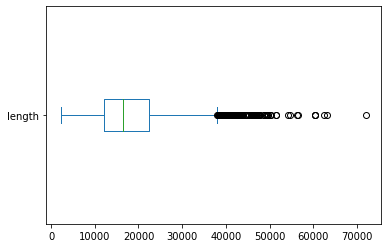

In [12]:
df['length'].plot(kind='box',vert=False)

>플롯을 보면, 연설의 50%는 길이가 12000 ~ 22000자이며 중앙값은 16,000자이고 오른쪽에는 다양한 이상값이고, 분포가 왼쪽으로 치운친 것을 볼 수 있다.

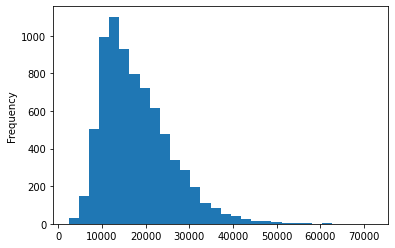

In [13]:
"""
히스토그램에서 길이 범위를 너비가 동일한 구간 30개로 나누고,
y축은 각 구간에서 속하는 문서의 개수를 나타낸다.
히스토그램을 그리면 더 자세한 정보를 얻을수 있다.
"""

df['length'].plot(kind='hist',bins=30)

---

**범주간의 값 분포 비교**

>데이터 특성은 데이터의 하위 집합을 검사할 때 종종 보이는데, 다양한 범주의 분포를 비교하는 좋은 시각화 도구는 seaborn의 catplot이다.



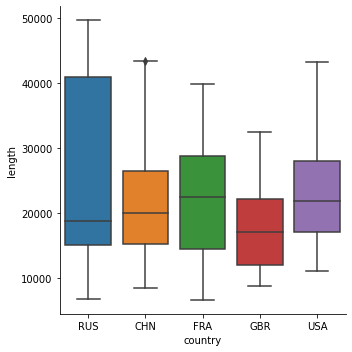

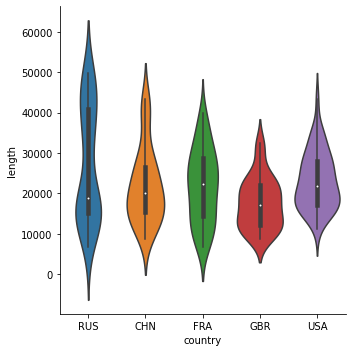

In [15]:
#박스플롯과 바이올릿 플롯을 사용해서
#상임이사 5인의 연설 길이 분포 비교

import seaborn as sns

where = df['country'].isin(["USA","FRA","GBR","CHN","RUS"])
sns.catplot(data=df[where], x='country', y='length',kind='box')
sns.catplot(data=df[where], x='country', y='length',kind='violin')

바이올린 플롯은 박스 플롯의 부드러운 버전이고, 빈도는 바이올린 플롯의 너비로 표현되었지만 바이올린 내부의 박스 플롯으로 확인할 수 있고, 두 플롯에서 모두 러시아(RUS)의 분산값이 영국(GBR)보다 훨씬 크다.

그러나, 러시아 같은 다중 피크의 존재는 바이올린 플롯에서만 분명해진다.

---

**시간 경과에 따른 변화 시각화**

>데이터에 날짜 혹은 시간이 주어졌을 때 시간 경과에 따른 데이터의 변화를 시각화하는 것은 흥미로운 과정으로 연간 연설 횟수를 분석해 첫 번째 시계열을 만든다.

pandas의 size()함수를 사용해서 그룹화한 후 그룹당 행의 개수를 반환하여 plot()함수를 추가해 결과 데이터프레임으로 간단히 시각화

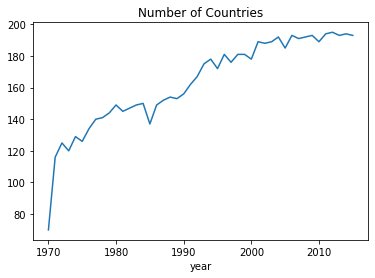

In [16]:
df.groupby('year').size().plot(title="Number of Countries")

각 국가는 일년에 한 번만 연설할 수 있고, 타임라인은 유엔 가입 국가 수의 변화를 나타낸다.

유엔 회원국의 수는 199개국이고, 더 많은 국가가 토론에 참여할수록 연설 시간이 줄어든다는 점이 흥미롭다.

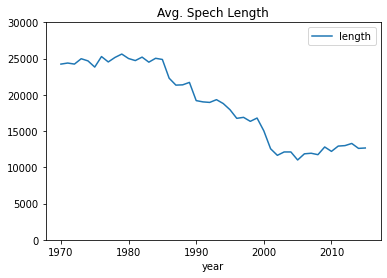

In [18]:
df.groupby("year").agg({'length':'mean'}) \
  .plot(title="Avg. Spech Length", ylim=(0,30000))

참고 링크:https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#serialization-io-conversion

---

**시간 리샘플링**

>유엔 데이터셋에는 연간 데이터가 이미 존재하므로, 정수 열인 year는 그룹화에 사용할 수 있는 이산값을 포함합니다.

<br>

데이터셋은 시각화할 때 적절한 단위로 집계가 가능하도록 세분화된 날짜 혹은 시간의 값을 포함하여 상황에 따라 시간 단위를 연간 또는 수십 년 등 다양하게 사용할 수 있다.

<br>

판다스에는 날짜/시간 값에 엑세스하는 기능이 내장되어 있다.

|Datatime 속성|설명|Datatime 속성|설명|
|------|------|------|------|
|dt.date|datetime에서 날짜부분|dt.hour|datetime에서 시간부분|
|dt.year|연도|dt.month|연도 안에서의 월|
|dt.quarter|연도 안에서의 분기|dt.week|연도 안에서의 주|

In [ ]:
"""
데이터프레임에서 time이란 이름의 열에 datetime에 데이터를 저장
그 다음 명령어로 데이터프레임 연도에 열을 추가할 수 있다.
"""
df['year'] = df['time'].dt.year

>적절한 레이블이 있는 시계열을 그리려면 2020/week 24같은 형태로 결합된 값이 필요하고 판다스에서 제공하는 dt.strftime()을 사용하여 유연하게 해결할 수 있다.

In [ ]:
df['week'] = df['time'].dt.strftime("%Y/Week %W")

>Pandas는 시계열 리샘플링을 위한 내장 함수 resample()을 제공하지만 시계열 데이터를 일 단위로 집계하므로 텍스트 작업에는 유용하지 않다.